<a href="https://colab.research.google.com/github/bhagone0/colab-notebooks/blob/master/decision_tree_and_iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:
from sklearn import datasets

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
iris = datasets.load_iris()

In [0]:
x = iris.data
y = iris.target

In [0]:
print(x.shape)
print(y.shape)

(150, 4)
(150,)


In [0]:
d = [{"sepal_length":row[0], 
      "sepal_width":row[1], 
      "petal_length":row[2], 
      "petal_width":row[3]} for row in x]

In [0]:
df = pd.DataFrame(d)
df["types"] = y # assign types
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,types
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [0]:
df = df.sample(frac=1.0)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,types
134,6.1,2.6,5.6,1.4,2
57,4.9,2.4,3.3,1.0,1
26,5.0,3.4,1.6,0.4,0
116,6.5,3.0,5.5,1.8,2
105,7.6,3.0,6.6,2.1,2


In [0]:
# this could alos be done as
iris2 = sns.load_dataset('iris')
print(iris2.head())
print(iris2.species.describe())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
count            150
unique             3
top       versicolor
freq              50
Name: species, dtype: object


**Visualistaion**

In [0]:
import seaborn as sns

import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

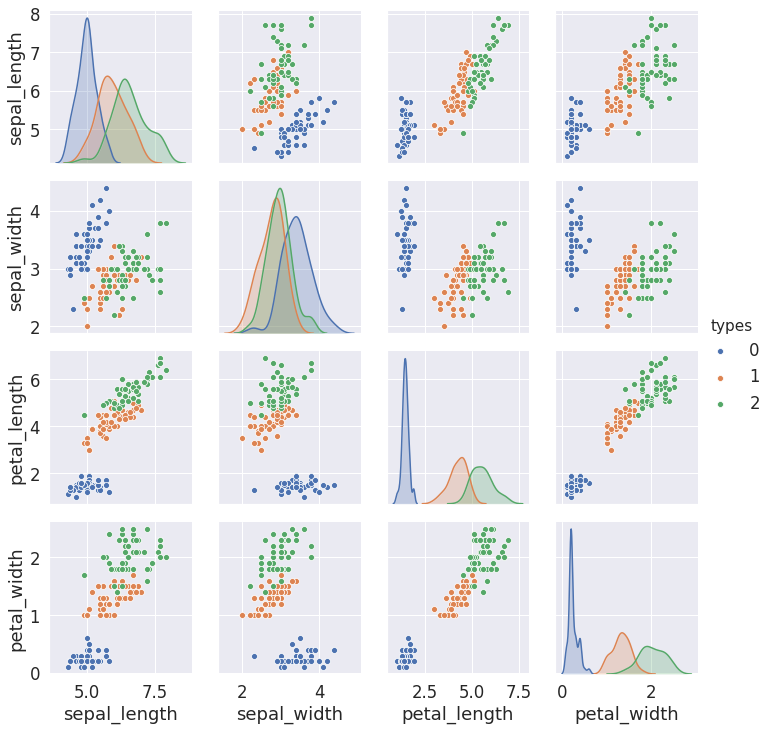

In [0]:
sns.set(font_scale=1.5)
sns.pairplot(df,hue="types",size=3);
plt.show()

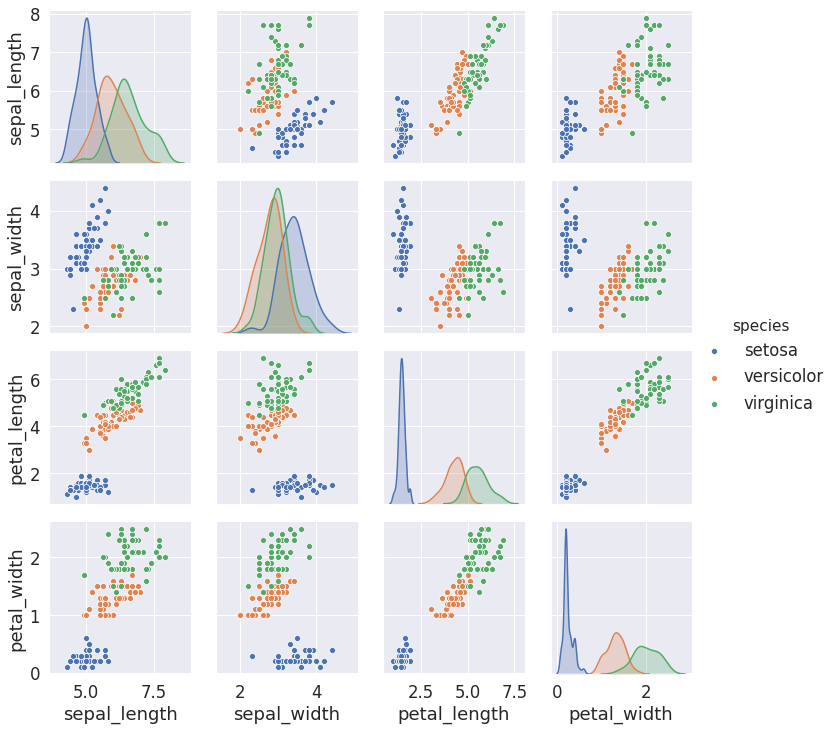

In [0]:
# sns.set(font_scale=1.5)
sns.pairplot(iris2, hue="species");
# plt.show()

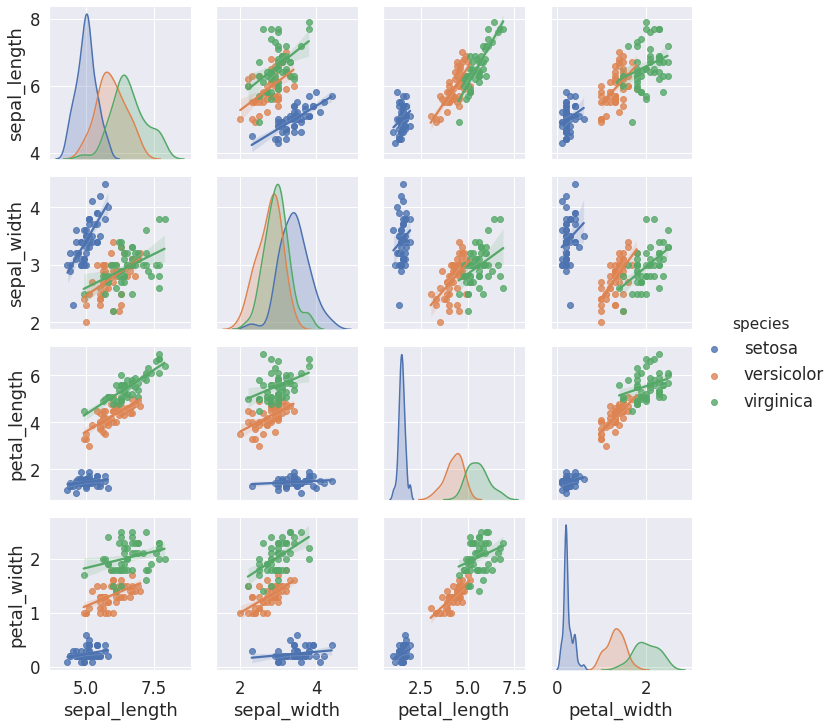

In [0]:
sns.pairplot(iris2, hue="species", kind='reg');

**Split**

In [0]:

# train test split, ratio = 0.8
features = df[["sepal_length","sepal_width","petal_length","petal_width"]]
types = df["types"]
train_features, test_features, train_types, test_types = train_test_split(features,types,train_size=0.8, random_state=1)

In [0]:
## Training and evaluation

In [0]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_features, train_types)

In [0]:
prediction = clf.predict(test_features)


In [0]:

# evaluation for multi class classification
from sklearn.metrics import classification_report
print(classification_report(test_types, prediction, target_names=["type0","type1","type2"]))

              precision    recall  f1-score   support

       type0       1.00      1.00      1.00         9
       type1       0.75      0.90      0.82        10
       type2       0.89      0.73      0.80        11

    accuracy                           0.87        30
   macro avg       0.88      0.88      0.87        30
weighted avg       0.88      0.87      0.87        30

